## 例題

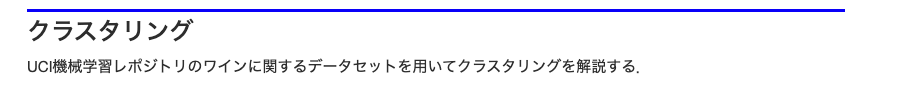

In [1]:
from IPython.display import Image
Image('wine.png')

## 解答

In [2]:
import pandas as pd

In [3]:
L = [
    "Alcohol",
    "Malic",
    "Ash",
    "Alcalinity",
    "Magnesium",
    "Phenols",
    "Flavanoids",
    "Nonflavanoid",
    "Proanthocyanins",
    "Color",
    "Hue",
    "OD280",
    "OD315",
    "Proline"
]
wine = pd.read_csv('http://logopt.com/data/wine.data', names=L)
wine.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoid,Proanthocyanins,Color,Hue,OD280,OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(wine)

KMeans(n_clusters=4)

In [5]:
wine['label'] = kmeans.labels_
wine.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoid,Proanthocyanins,Color,Hue,OD280,OD315,Proline,label
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,3
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,3
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


### パラメータ k の適正化 （エルボー法）

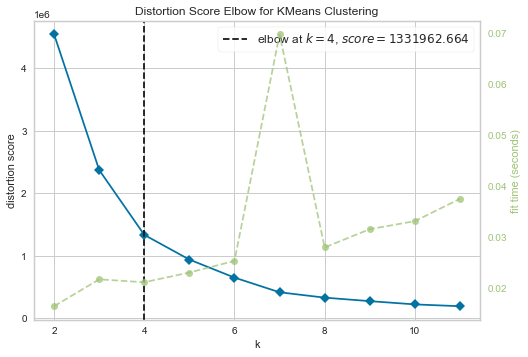

In [6]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(kmeans, k=(2, 12))
visualizer.fit(wine)
visualizer.show();

### クラスター間の距離の可視化

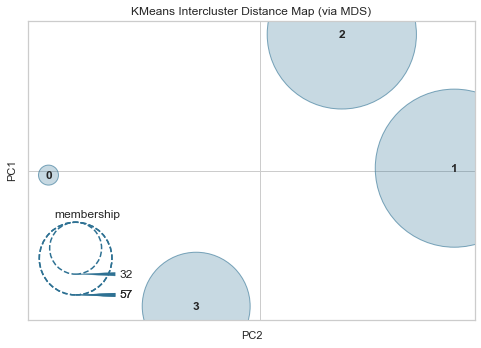

In [7]:
from yellowbrick.cluster import InterclusterDistance

kmeans = KMeans(n_clusters=4, random_state=123)
visualizer = InterclusterDistance(kmeans)
visualizer.fit(wine)
visualizer.show();